In [0]:
!git clone https://github.com/someshsingh22/FlaiReddit-MIDAS
%cd FlaiReddit-MIDAS

fatal: destination path 'FlaiReddit-MIDAS' already exists and is not an empty directory.
/content/FlaiReddit-MIDAS


### **Import**

In [0]:
from modules.crawler import *

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### **Load Data, Stats**

In [0]:
raw_df=pd.read_csv("data/raw_data.csv")
with open("data/stats.pkl",'rb') as f:
  x=pickle.load(f)
  post_count,post_date = [post[1] for post in x],[post[0] for post in x]

#### ***Reddit Daily Activity***
Let's plot datewise posts on r/india and compare with the plots available on subredditstats Daily Activity on r/india can be viewed at : [subredditstats](https://subredditstats.com/r/india)


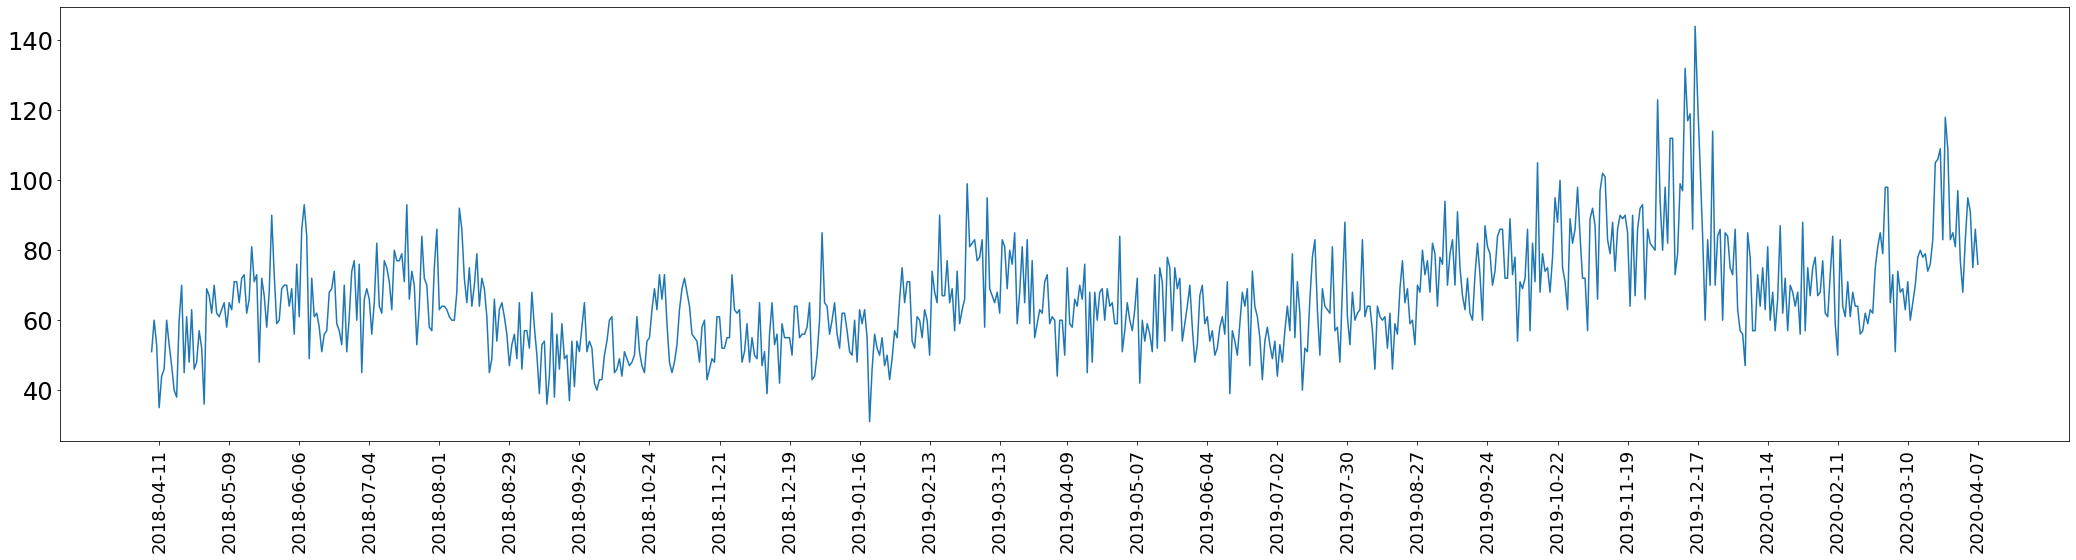

In [0]:
plt.figure(figsize=(36,8))
plt.xticks(fontsize=18,rotation=90)
plt.yticks(fontsize=24,rotation=0)
g=sns.lineplot(y=post_count, x=post_date)
g.set(xticks=post_date[::28])
plt.show()

#### ***Reddit Weekly Activity***
On visualizing weekly activity, its uniformity is confirmed.

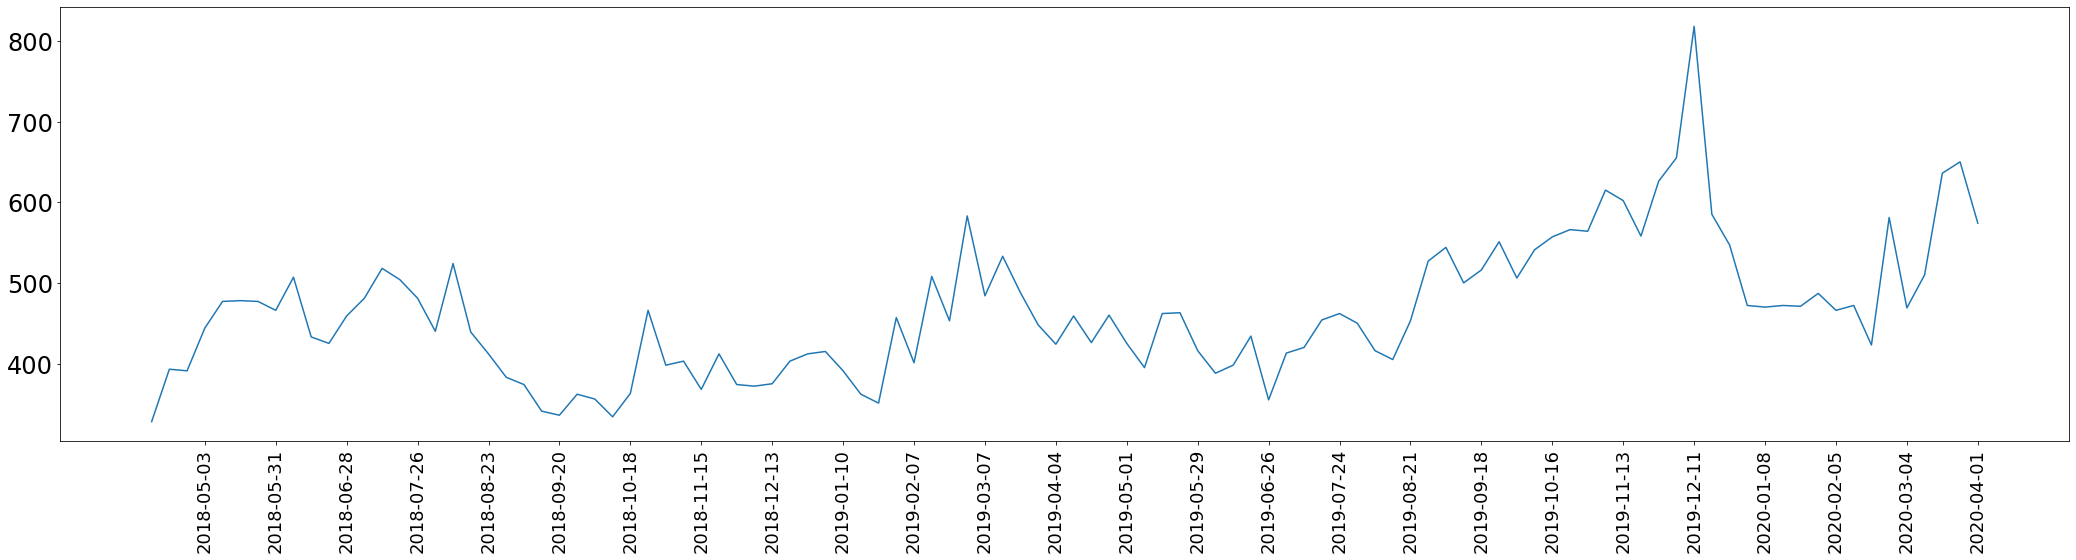

In [0]:
n=7
chunks_count = [post_count[i * n:(i + 1) * n] for i in range((len(post_count) + n - 1) // n )]
chunks_date = [post_date[i * n:(i + 1) * n] for i in range((len(post_date) + n - 1) // n )]
chunks_count=[sum(chunk) for chunk in chunks_count]
chunks_date=[chunk[-1] for chunk in chunks_date]

plt.figure(figsize=(36,8))
plt.xticks(fontsize=18,rotation=90)
plt.yticks(fontsize=24,rotation=0)
g=sns.lineplot(x=chunks_date[:-1], y=chunks_count[:-1])
g.set(xticks=chunks_date[:-1][::4])
plt.show()

In [0]:
import collections
counter=collections.Counter(raw_df['Flair'])
print(counter)
raw_df['Flair'].fillna('NA',inplace=True)
raw_df['Flair'].replace('Askindia','AskIndia',inplace=True)
counter=collections.Counter(raw_df['Flair'])
print(counter)

Counter({nan: 18772, 'AskIndia': 13159, 'Non-Political': 6331, 'Politics': 4632, 'Policy/Economy': 895, 'Science/Technology': 891, '[R]eddiquette': 860, 'Business/Finance': 780, 'Coronavirus': 724, 'Scheduled': 445, 'Food': 274, 'Demonetization': 268, 'Sports': 236, 'Photography': 125, 'CAA-NRC': 112, 'Science &amp; Technology': 15, 'AMA': 7, 'Low-effort self-post.': 4, 'CAA-NRC-NPR': 2, 'Announcement': 2, 'Casual': 2, 'Verified': 1, 'Meta': 1, 'PARTAYYY AGAIN :D': 1, 'Shitpost': 1, 'AMA Announcement': 1, 'Low-effort Self Post.': 1, 'Askindia': 1, 'Misleading': 1})
Counter({'NA': 18772, 'AskIndia': 13160, 'Non-Political': 6331, 'Politics': 4632, 'Policy/Economy': 895, 'Science/Technology': 891, '[R]eddiquette': 860, 'Business/Finance': 780, 'Coronavirus': 724, 'Scheduled': 445, 'Food': 274, 'Demonetization': 268, 'Sports': 236, 'Photography': 125, 'CAA-NRC': 112, 'Science &amp; Technology': 15, 'AMA': 7, 'Low-effort self-post.': 4, 'CAA-NRC-NPR': 2, 'Announcement': 2, 'Casual': 2, 'Ver

In [0]:
Flairs=[]
for k,v in counter.items():
  if v>500:
    Flairs.append(k)
raw_df=raw_df[raw_df['Flair'].apply(lambda x : x in set(Flairs))]

In [0]:
df_=raw_df[['Title','Flair','Text']]

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [0]:
import numpy as np

In [0]:
cv=CountVectorizer(stop_words='english',ngram_range=(1,4),min_df=5, max_features=5000)
data1=cv.fit_transform(df_['Text']).toarray()
cv=CountVectorizer(stop_words='english',ngram_range=(1,4),min_df=5, max_features=5000)
data2=cv.fit_transform(df_['Title']).toarray()

In [0]:
tfidf=TfidfVectorizer(stop_words='english',ngram_range=(1,4), min_df=5, max_features=5000)
data3=tfidf.fit_transform(df_['Text']).toarray()
tfidf=TfidfVectorizer(stop_words='english',ngram_range=(1,4), min_df=5, max_features=5000)
data4=tfidf.fit_transform(df_['Title']).toarray()

In [0]:
data=np.concatenate([data1, data2, data3, data4],axis=1)

In [0]:
data.shape

(47045, 20000)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data, df_['Flair'], stratify=df_['Flair'], test_size=0.2)

In [0]:
model=LogisticRegression()
model.fit(X_train,y_train)
y=model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
print(classification_report(y,y_test))

                    precision    recall  f1-score   support

          AskIndia       0.43      0.42      0.42      2739
  Business/Finance       0.14      0.27      0.18        83
       Coronavirus       0.42      0.54      0.47       114
                NA       0.56      0.50      0.53      4267
     Non-Political       0.29      0.34      0.31      1080
    Policy/Economy       0.31      0.47      0.37       117
          Politics       0.44      0.48      0.46       842
Science/Technology       0.11      0.18      0.14       110
     [R]eddiquette       0.02      0.05      0.03        57

          accuracy                           0.45      9409
         macro avg       0.30      0.36      0.32      9409
      weighted avg       0.47      0.45      0.45      9409

